The objective of this project is to analyze the SFR (SpaceFund Realty) of the aerospace companies and their missions in order to help the investors to make better decisions. The SFR is a rating for the companies based on their missions, payload, launch cost and other factors, which tells how developed the company is and how stable it is. The SFR is a rating between 1-9. The higher the rating, the more developed the company is.

In [2]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:

#Loading the dataset
df = pd.read_csv(r"C:\Users\sonia\Downloads\Launch SFR.csv")
df.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Price ($/kg),Funding ($M),Launch Class,Orbit Altitude,Tech Type,Country,HQ Location,Description
0,Arianespace/Avio,9,"20,000",170.00,"8,500",Public,"Medium, Heavy",LEO,Rocket,Italy,Colleferro,Developing the Vega & Ariane launch vehicles
1,Astra Space,9,300,3.95,"13,167",Public,Small,LEO,Rocket,United States,"Alameda, CA",Providing routine launch access to Earth orbit...
2,Black Sky Aerospace,9,350,0.60,"1,714",-,Small,Suborbital,Rocket,Australia,"Browns Plains, Queensland","Offers a range of sounding rockets, capable of..."
3,Blue Origin,9,0,0.00,0,-,"Tourism, Small, Heavy",Suborbital,Rocket,United States,"Kent, WA",Lowering the cost of access to space with reus...
4,CNIM Air Space,9,"2,700",0.00,0,Public,"Small, Medium",Suborbital,Balloon,France,Ayguesvives,Balloons that lift anything from a few kilogra...


# Data Preprocessing

In [7]:
#Checking the shape of the dataset
df.shape

(183, 12)

In [9]:
#Checking the datatypes of the columns
df.dtypes

Company              object
SFR                   int64
Payload (kg)         object
Launch Cost ($M)    float64
Price ($/kg)         object
Funding ($M)         object
Launch Class         object
Orbit Altitude       object
Tech Type            object
Country              object
HQ Location          object
Description          object
dtype: object

In [11]:
#type casting
df['Payload (kg)'] = df['Payload (kg)'].astype(str).str.replace(',', '').astype(float)
df['Launch Cost ($M)'] = df['Launch Cost ($M)'].astype(str).str.replace(',', '').astype(float)
df['Price ($/kg)'] = df['Price ($/kg)'].astype(str).str.replace(',', '').astype(float)

In [13]:
#Checking '-' (null values) values in the dataset
df.isin(['-']).sum()

Company               0
SFR                   0
Payload (kg)          0
Launch Cost ($M)      0
Price ($/kg)          0
Funding ($M)        110
Launch Class         16
Orbit Altitude        3
Tech Type             0
Country               0
HQ Location           8
Description           0
dtype: int64

In [15]:
#droping the column
df.drop(['Funding ($M)'], axis=1, inplace=True)

#replacing the '-' values with mode
df['Launch Class'].replace('-', df['Launch Class'].mode()[0], inplace=True)
df['Orbit Altitude'].replace('-', df['Orbit Altitude'].mode()[0], inplace=True)

In [17]:
df.drop(['HQ Location'], axis=1, inplace=True)

In [19]:
#Checking for unique values in the dataset
df.nunique()

Company             183
SFR                  10
Payload (kg)         65
Launch Cost ($M)     46
Price ($/kg)         53
Launch Class         10
Orbit Altitude        4
Tech Type             8
Country              31
Description         183
dtype: int64

In [21]:
cols = ['Launch Class', 'Orbit Altitude', 'Tech Type']
for i in cols:
    print(i, df[i].unique(), '\n')

Launch Class ['Medium, Heavy' 'Small' 'Tourism, Small, Heavy' 'Small, Medium'
 'Heavy, Super Heavy' 'Tourism' 'Medium' 'Small, Heavy' 'Tourism, Medium'
 'Heavy'] 

Orbit Altitude ['LEO' 'Suborbital' 'GTO' 'Lunar'] 

Tech Type ['Rocket' 'Balloon' 'Balloon, Rocket' 'Spaceplane' 'Plane, Rocket' 'Other'
 'Rocket, Other' 'Rocket, Spaceplane'] 



In [23]:
def l_class(launch):
    if launch in ['Medium, Heavy','Medium']:
        return 'Medium'
    elif launch in ['Small', 'Small, Medium', 'Small, Heavy']:
        return 'Small'
    elif launch in ['Heavy', 'Heavy, Super Heavy']:
        return 'Heavy'
    elif launch in ['Tourism', 'Tourism, Small, Heavy','Tourism, Medium']:
        return 'Tourism'
df['Launch Class'] = df['Launch Class'].apply(l_class)

In [25]:
df['Launch Class'].value_counts()

Launch Class
Small      152
Medium      15
Tourism     10
Heavy        6
Name: count, dtype: int64

In [27]:
def tech_type(tech):
    if tech in ['Rocket', 'Plane, Rocket', 'Rocket, Other', 'Rocket, Spaceplane']:
        return 'Rocket'
    elif tech in ['Ballon', 'Balloon, Rocket']:
        return 'Balloon'
    elif tech in ['Spaceplane']:
        return 'Spaceplane'
    else:
        return 'Other'
df['Tech Type'] = df['Tech Type'].apply(tech_type)


In [29]:

df['Tech Type'].value_counts()

Tech Type
Rocket        133
Other          23
Spaceplane     20
Balloon         7
Name: count, dtype: int64

In [31]:
df['Description'].value_counts()

Description
Developing the Vega & Ariane launch vehicles                                                                                                                         1
Developing the UK’s first commercially operated horizontal launch company for small to medium size satellites                                                        1
Developing a balloon-launched vehicle for smallsat payloads                                                                                                          1
Developing a unique seaborne launch system                                                                                                                           1
Personalized engineering support and dedicated airborne orbital launch platform                                                                                      1
                                                                                                                                                         

In [33]:
df.describe()

,SFR,Payload (kg),Launch Cost ($M),Price ($/kg)
count,183.000000,183.000000,183.000000,183.000000
mean,3.726776,2579.677596,4.840956,6587.256831
std,2.527148,8834.385310,19.132872,12755.241486
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,16.000000,0.000000,0.000000
50%,3.000000,186.000000,0.000000,0.000000
75%,5.000000,746.500000,1.500000,9250.000000
max,9.000000,63800.000000,170.000000,100000.000000


In [35]:
df['Payload (kg)'] = df['Payload (kg)'].replace(0, df['Payload (kg)'].mean())
df['Launch Cost ($M)'] = df['Launch Cost ($M)'].replace(0, df['Launch Cost ($M)'].mean())
df['SFR'] = df['SFR'].replace(0, df['SFR'].median())

In [37]:
df.drop(columns = 'Price ($/kg)', axis=1, inplace=True)

In [39]:

df.head()

,Company,SFR,Payload (kg),Launch Cost ($M),Launch Class,Orbit Altitude,Tech Type,Country,Description
0,Arianespace/Avio,9,20000.000000,170.000000,Medium,LEO,Rocket,Italy,Developing the Vega & Ariane launch vehicles
1,Astra Space,9,300.000000,3.950000,Small,LEO,Rocket,United States,Providing routine launch access to Earth orbit...
2,Black Sky Aerospace,9,350.000000,0.600000,Small,Suborbital,Rocket,Australia,"Offers a range of sounding rockets, capable of..."
3,Blue Origin,9,2579.677596,4.840956,Tourism,Suborbital,Rocket,United States,Lowering the cost of access to space with reus...
4,CNIM Air Space,9,2700.000000,4.840956,Small,Suborbital,Other,France,Balloons that lift anything from a few kilogra...


# Exploratory Data Analysis

# Country of Origin

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'China'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Australia'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Japan'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Germany'),
  Text(9, 0, 'Russia'),
  Text(10, 0, 'Spain'),
  Text(11, 0, 'South Korea'),
  Text(12, 0, 'Netherlands'),
  Text(13, 0, 'Ukraine'),
  Text(14, 0, 'Argentina'),
  Text(15, 0, 'Brazil'),
  Text(16, 0, 'South Africa'),
  Text(17, 0, 'Thailand'),
  Text(18, 0, 'Czech Republic'),
  Text(19, 0, 'Luxembourg'),
  Text(20, 0, 'Uzbekistan'),
  Text(21, 0, 'Turkey'),
  Text(22, 0, 'Croatia'),
  Text(23, 0, 'Italy'),
  Text(24, 0, 'Malaysia'),
  Text(25, 0, 'Taiwan'),
  Text(26, 0, 'Norway'),
  Text(27, 0, 'Philippines'),
  Text(28, 0, 'Poland'),
  Text(29, 0, 'Sweden'),
  Text(30, 0, 'Pakistan')])

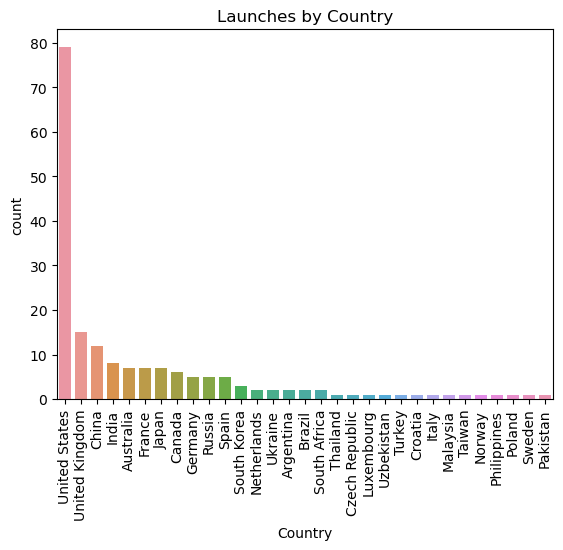

In [43]:
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index).set_title('Launches by Country')
plt.xticks(rotation=90)


# Tech Type

Text(0.5, 1.0, 'Launches by Tech Type')

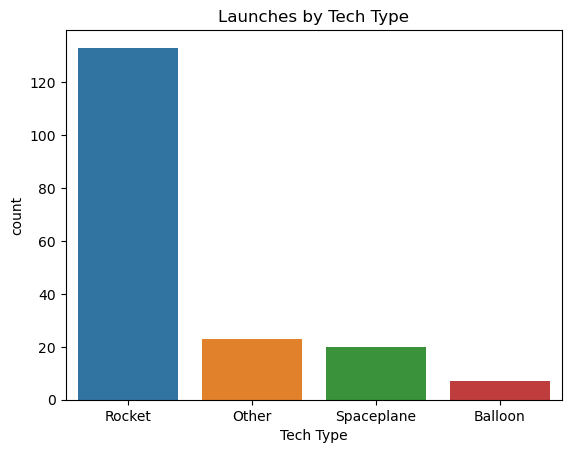

In [46]:
sns.countplot(x = 'Tech Type', data = df, order = df['Tech Type'].value_counts().index).set_title('Launches by Tech Type')

# Launch Class

Text(0.5, 1.0, 'Launches by Launch Class')

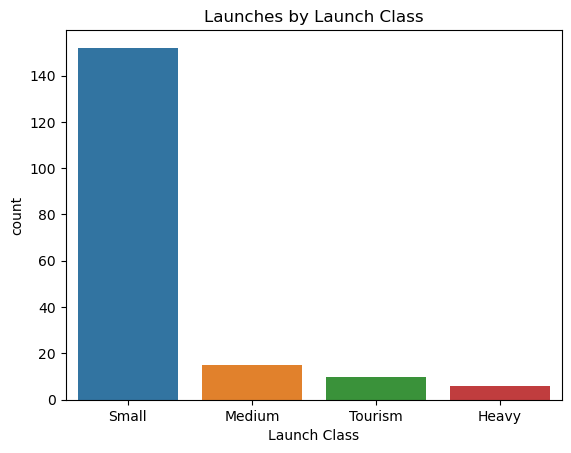

In [49]:
sns.countplot(x = 'Launch Class', data = df, order = df['Launch Class'].value_counts().index).set_title('Launches by Launch Class')

# Orbit Altitude


Text(0.5, 1.0, 'Launches by Orbit Altitude')

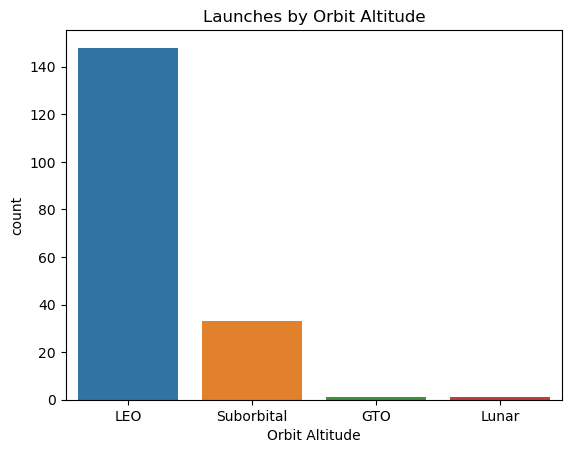

In [54]:
sns.countplot(x = 'Orbit Altitude', data = df, order = df['Orbit Altitude'].value_counts().index).set_title('Launches by Orbit Altitude')


# Company Description


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

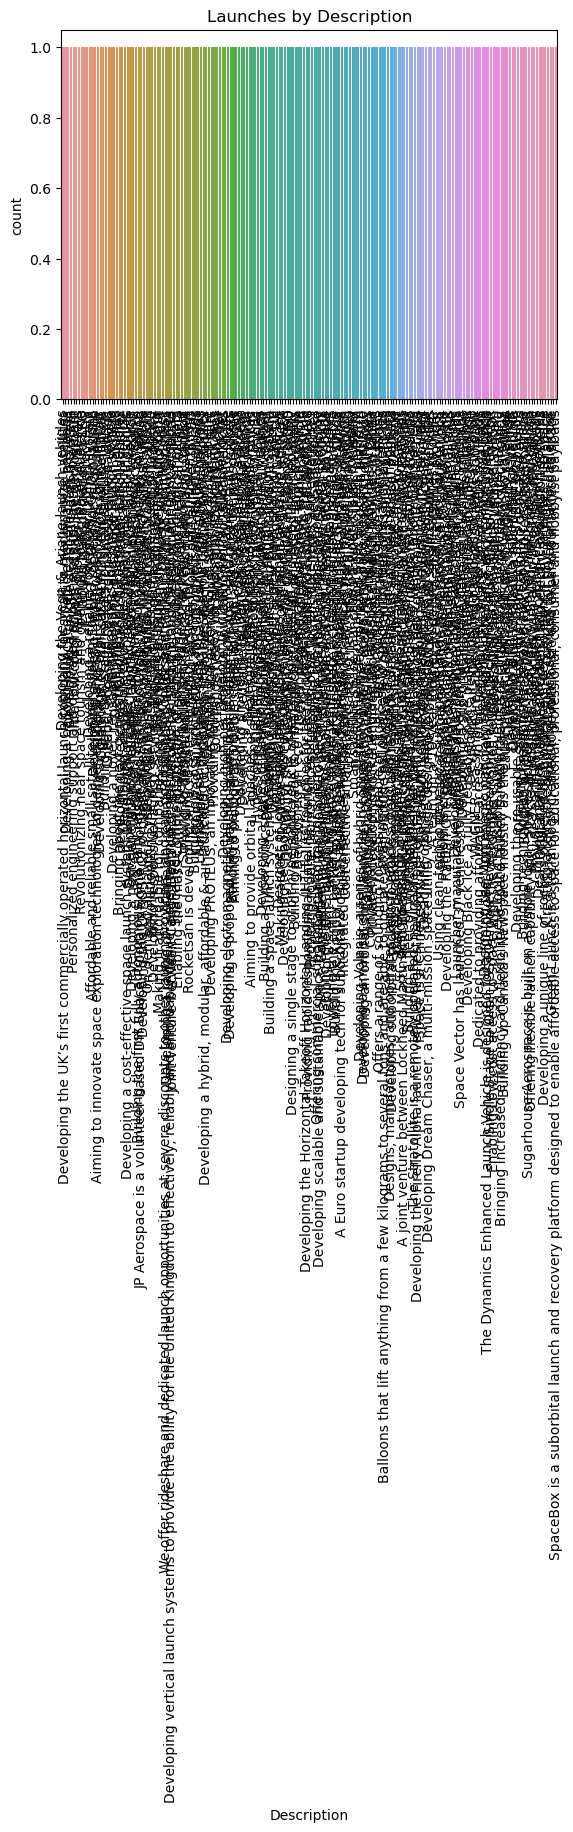

In [57]:

sns.countplot(x = 'Description', data = df, order = df['Description'].value_counts().index).set_title('Launches by Description')
plt.xticks(rotation=90)

# Payload Distributio

C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Payload Distribution')

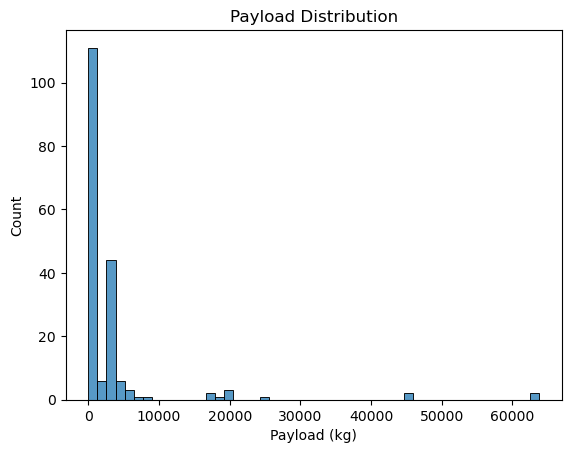

In [60]:
sns.histplot(x = 'Payload (kg)', data = df, bins = 50).set_title('Payload Distribution')



C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Launch Cost Distribution')

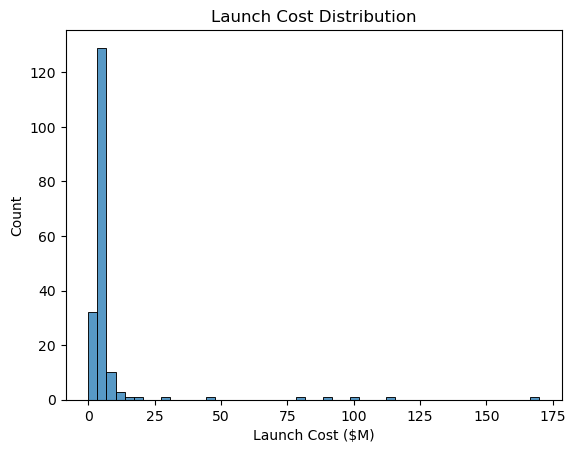

In [62]:
# Launch Cost Distribution

sns.histplot(x = 'Launch Cost ($M)', data = df, bins = 50).set_title('Launch Cost Distribution')



C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'SFR Distribution')

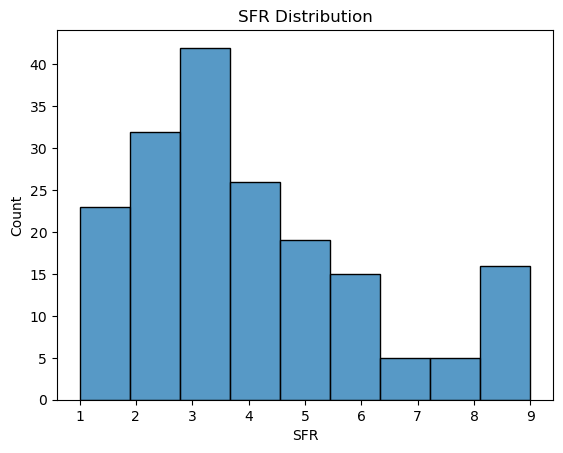

In [64]:
# SFR Distribution
sns.histplot(x = 'SFR', data = df, bins = 9).set_title('SFR Distribution')

Text(0.5, 0, 'Number of Launches')

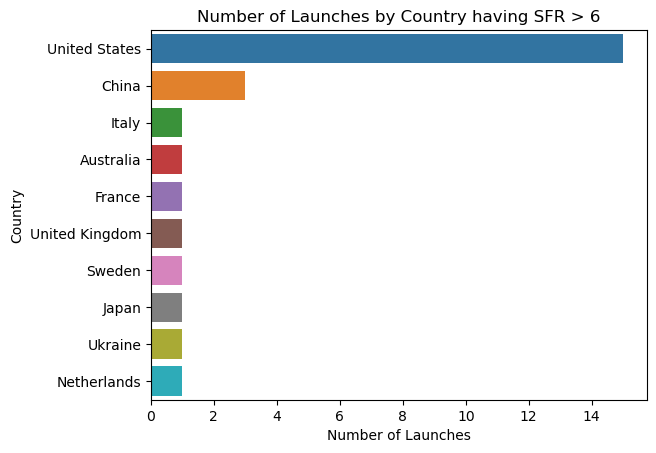

In [66]:
# Top 10 countries with SFR greater than 6

sns.barplot(y = 'Country', x = 'SFR', data = df[df['SFR'] > 6], estimator = len, order = df[df['SFR'] > 6]['Country'].value_counts().index).set_title('Number of Launches by Country having SFR > 6')
plt.xlabel('Number of Launches')

# SFR and Tech Type

AttributeError: 'numpy.int64' object has no attribute 'startswith'

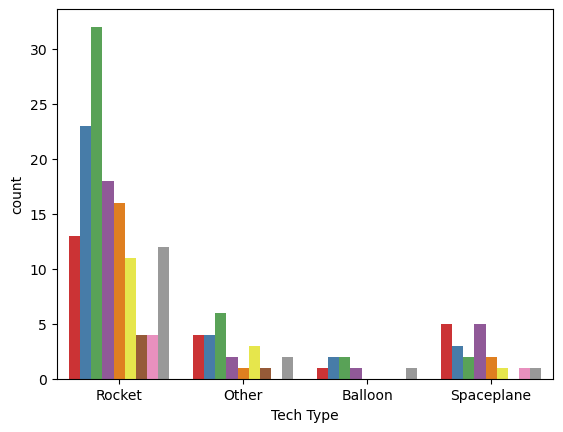

In [69]:
sns.countplot(x = 'Tech Type', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Tech Type')

# SFR and Launch Class

AttributeError: 'numpy.int64' object has no attribute 'startswith'

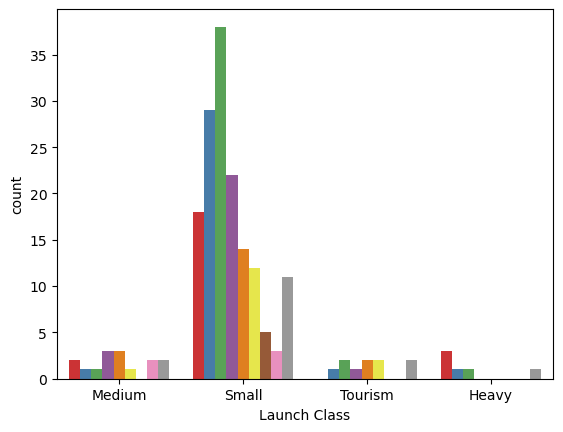

In [72]:
sns.countplot(x = 'Launch Class', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Launch Class')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

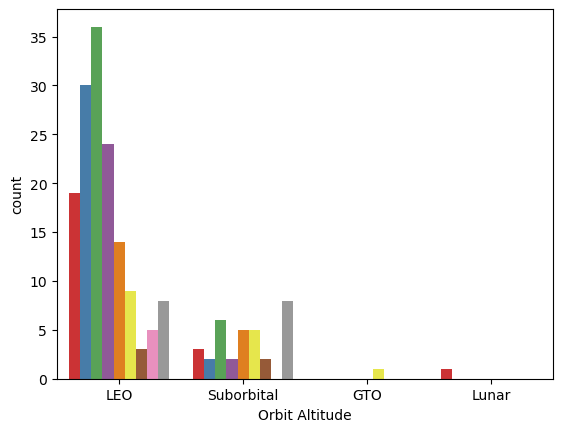

In [74]:
# SFR and Orbit Altitude

sns.countplot(x = 'Orbit Altitude', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Orbit Altitude')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

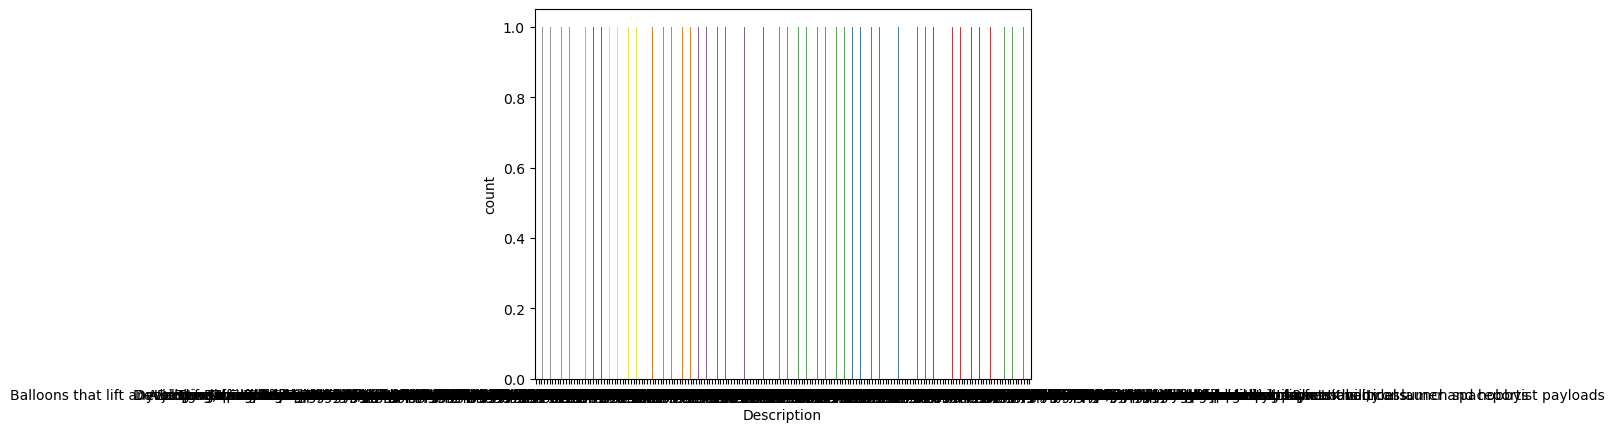

In [76]:
# SFR and Description


sns.countplot(x = 'Description', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Description')
plt.xticks(rotation=90)

sns.countplot(x = 'Description', data = df, hue= 'SFR', palette= 'Set1').set_title('SFR and Description')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'SFR and Payload')

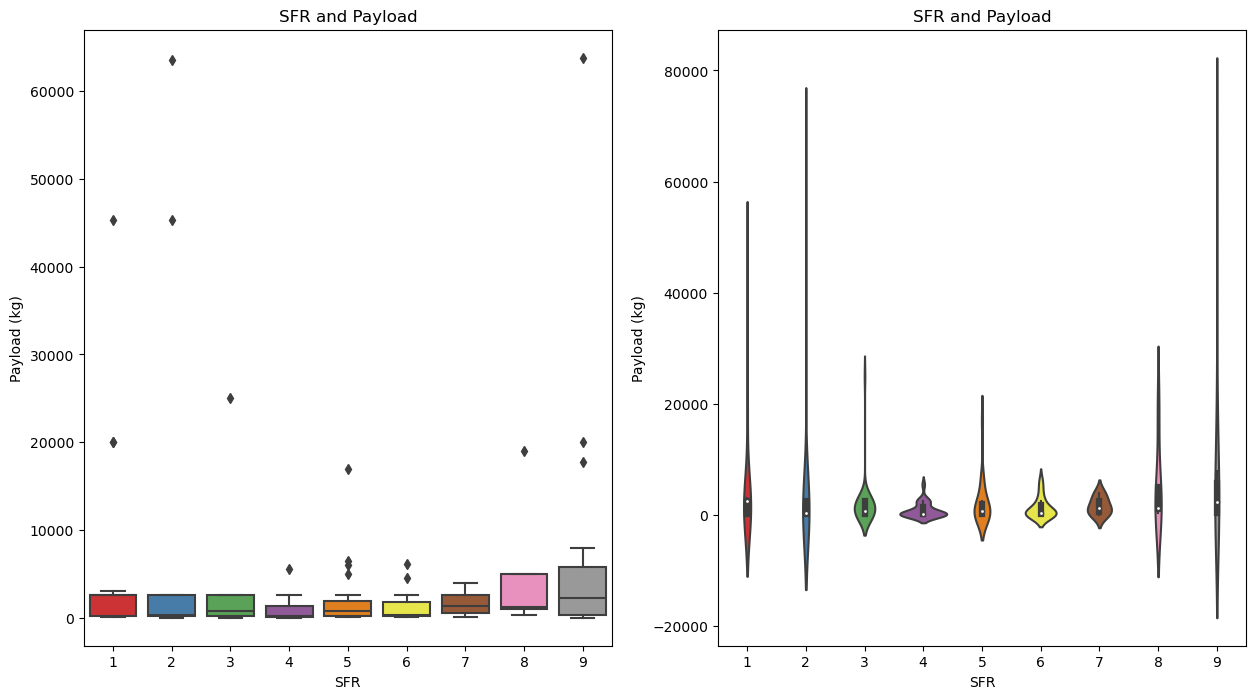

In [78]:
# SFR and Payload

fig, ax = plt.subplots(1,2,figsize=(15, 8))
sns.boxplot(x = 'SFR', y = 'Payload (kg)', data = df, ax = ax[0], palette = 'Set1').set_title('SFR and Payload')
sns.violinplot(x = 'SFR', y = 'Payload (kg)', data = df, ax = ax[1], palette = 'Set1').set_title('SFR and Payload')

Text(0.5, 1.0, 'SFR and Launch Cost')

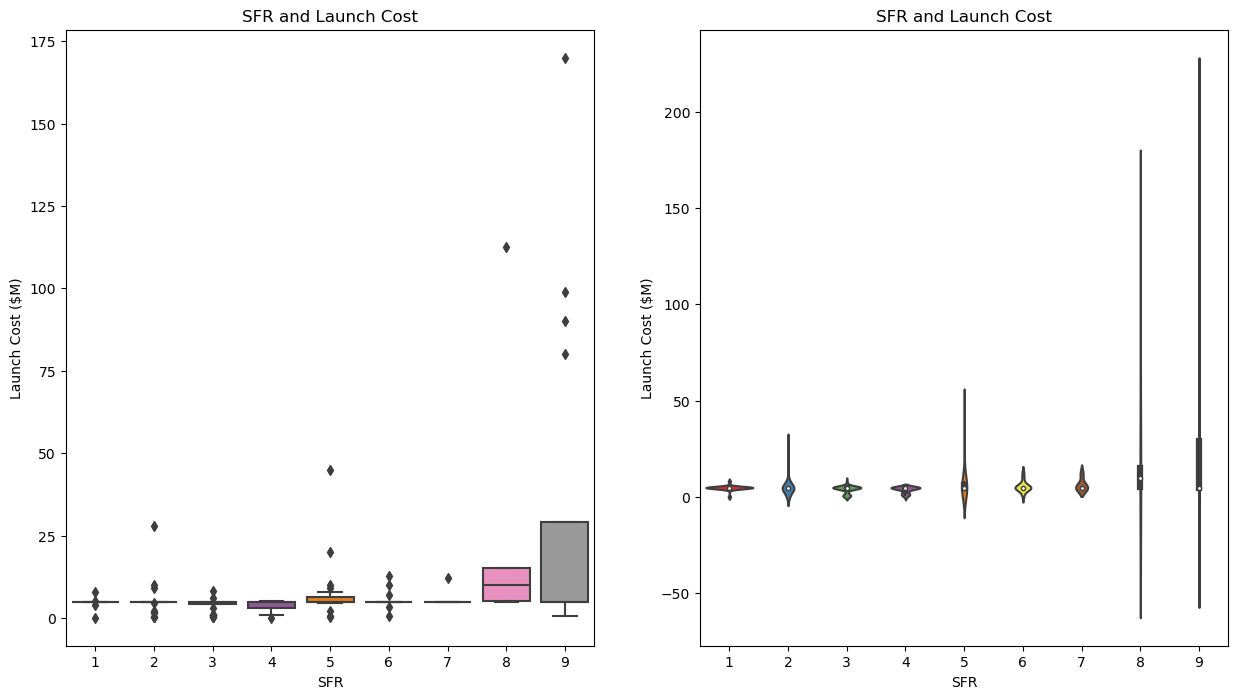

In [80]:
# SFR and Launch Cost

fig, ax = plt.subplots(1,2,figsize=(15, 8))
sns.boxplot(x = 'SFR', y = 'Launch Cost ($M)', data = df, ax = ax[0], palette = 'Set1').set_title('SFR and Launch Cost')
sns.violinplot(x = 'SFR', y = 'Launch Cost ($M)', data = df, ax = ax[1], palette = 'Set1').set_title('SFR and Launch Cost')

# Data Preprocessing Part 2

In [83]:
#dropping column country and company name because the SFR is dependent upon the mission specific parameters
df.drop(columns = ['Country', 'Company'], axis=1, inplace=True)

# Outlier removal

In [86]:
#Using Z score to remove outliers
cols = ['Payload (kg)', 'Launch Cost ($M)']
from scipy import stats
z = np.abs(stats.zscore(df[cols]))
df = df[(z < 3).all(axis=1)]


In [88]:
# Label Encoding the object type columns

from sklearn.preprocessing import LabelEncoder

#Label Encoding Object
le = LabelEncoder()

#object type columns
obj_cols = ['Launch Class', 'Orbit Altitude', 'Tech Type', 'Description']

#Label Encoding
for i in obj_cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique(), '\n')

Launch Class [2 3 1 0] 

Orbit Altitude [1 3 0 2] 

Tech Type [2 1 0 3] 

Description [144 133 124   9  91  88 163 151 166  15 165 162  95 174  42  47  23  28
 107 122 129  86  30 152  94   7 125  13  17   0 115  31  29 164 154  76
  51  68  78  82 137   2  84  26 119 105  55  46 104 131  24  19 160 130
 142 139  44 135  73  33 140 113  12  93 169 110 168 145 100 128  41  85
 120 155  70   8  45 108  39 171  37 101  43 161 153  36 143 138  96  90
  57   1  25 116  97  58 134 149  83  75 127  11 172  61 106 117 157 111
  53  62 103  10  52  74 136 167 118 148 112 147  63   3  54   4  34  21
  27  18  59  80  71  65 159  99 102 114  87  66  16  72 109 170  40 126
  89  98  69  20  77  92 146   6 158 150  64 173  22  35 121  32  56  50
  49 141 123  67  48  81  79  60  14   5 132  38 156] 



C:\Users\sonia\AppData\Local\Temp\ipykernel_5356\1434228826.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.transform(df[i])
C:\Users\sonia\AppData\Local\Temp\ipykernel_5356\1434228826.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.transform(df[i])
C:\Users\sonia\AppData\Local\Temp\ipykernel_5356\1434228826.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [90]:
df['SFR'] = df['SFR'].apply(lambda x: 1 if x > 6 else 0)

C:\Users\sonia\AppData\Local\Temp\ipykernel_5356\2675719519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SFR'] = df['SFR'].apply(lambda x: 1 if x > 6 else 0)


# Coorelation Matrix Heatmap

<Axes: >

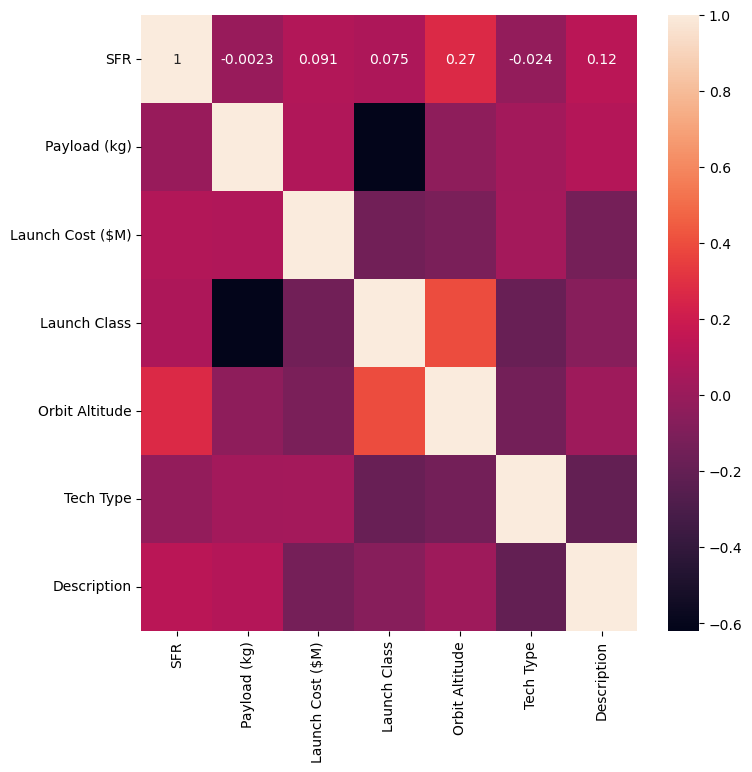

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

In [95]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = 'SFR', axis=1), df['SFR'], test_size=0.3, random_state=0)


In [97]:
# Model Building
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier Object
rfc = RandomForestClassifier()


In [99]:
from sklearn.model_selection import GridSearchCV

#parameters for GridSearchCV
para_grid = {
    'min_samples_split': [2,4,6,8],
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'random_state': [0,42]
}

#GridSearchCV Object
grid = GridSearchCV(estimator=rfc, param_grid=para_grid, cv=5, verbose=2, n_jobs=-1)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [100]:
#model with best parameters
rfc = RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rfc.fit(X_train, y_train)

#training accuracy
print('Training Accuracy: ', rfc.score(X_train, y_train))

#prediction
r_pred = rfc.predict(X_test)

Training Accuracy:  0.8934426229508197


In [103]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classifier Object
dtc = DecisionTreeClassifier()

rom sklearn.model_selection import GridSearchCV

#parameters for GridSearchCV
para_grid = {
    'min_samples_split': [2,4,6,8],
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'random_state': [0,42]
}

#GridSearchCV Object
grid = GridSearchCV(estimator=dtc, param_grid=para_grid, cv=5, verbose=2, n_jobs=-1)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

rom sklearn.model_selection import GridSearchCV

#parameters for GridSearchCV
para_grid = {
    'min_samples_split': [2,4,6,8],
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'random_state': [0,42]
}

#GridSearchCV Object
grid = GridSearchCV(estimator=dtc, param_grid=para_grid, cv=5, verbose=2, n_jobs=-1)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)


SyntaxError: invalid syntax (970953762.py, line 8)

In [105]:
#model with best parameters
dtc = DecisionTreeClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=2, random_state=0)

#Fitting the model
dtc.fit(X_train, y_train)

#training accuracy
print('Training Accuracy: ', dtc.score(X_train, y_train))

#prediction
d_pred = dtc.predict(X_test)

NameError: name 'DecisionTreeClassifier' is not defined

# Model Evaluation

NameError: name 'd_pred' is not defined

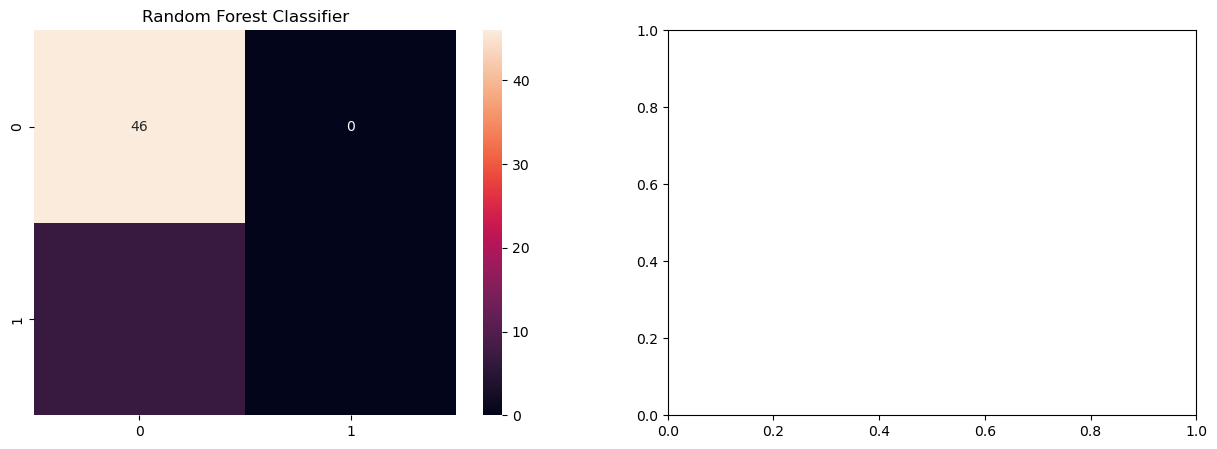

In [108]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, ax=ax[0], fmt='g').set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, ax=ax[1], fmt='g').set_title('Decision Tree Classifier')

C:\Users\sonia\AppData\Local\Temp\ipykernel_5356\2391374084.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax=ax[0], color = 'r').set_title('Random Forest Classifier')
C:\Users\sonia\anaconda4\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sonia\AppData\Local\Temp\ipykernel_5356\2391374084.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

NameError: name 'd_pred' is not defined

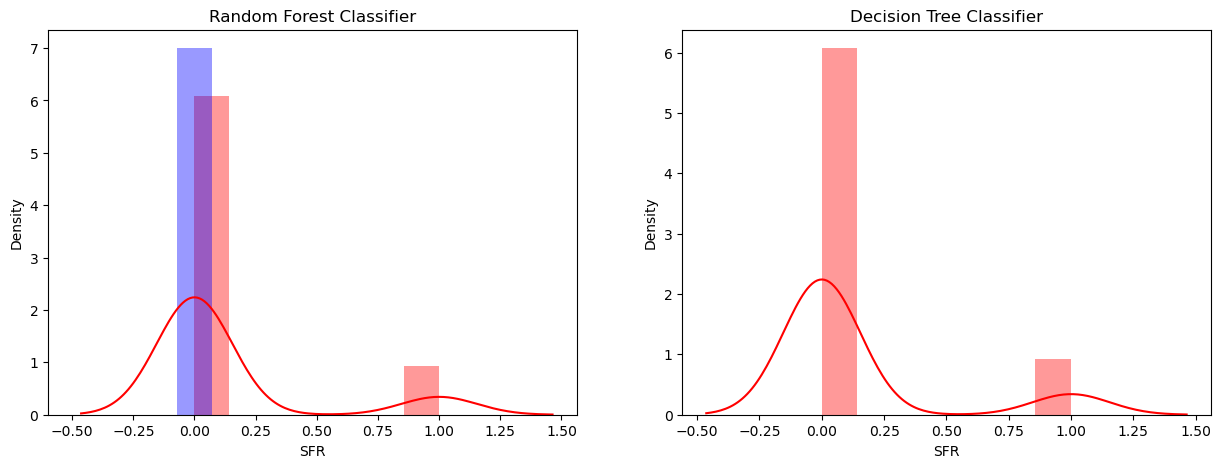

In [110]:
# Distribution Plot

fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.distplot(y_test, ax=ax[0], color = 'r').set_title('Random Forest Classifier')
sns.distplot(r_pred, ax=ax[0], color = 'b')
sns.distplot(y_test, ax=ax[1], color = 'r').set_title('Decision Tree Classifier')
sns.distplot(d_pred, ax=ax[1], color = 'b')

# Classification Report

from sklearn.metrics import classification_report

print('Random Forest Classifier\n', classification_report(y_test, r_pred),'\n')
print('Decision Tree Classifier\n', classification_report(y_test, d_pred))

# Conclusion

Coming to the machine learning models, I have used Decision Tree and Random Forest Classifier. Both the models have given similar result with similar accuracy, i.e. 87%. However, due to small dataset, the models had very poor recall score in predictiong the SFR greater than 6. This could be improved by increasing the datas